<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pandas Example**

This is an example notebook describing the basics of Pandas, a Python library for analyzing and manipulating data. More details are available on the [Pandas Home Page](https://pandas.pydata.org/).

This example uses an [automotive](https://archive.ics.uci.edu/ml/datasets/Automobile) data set from [University of California, Irvine](https://uci.edu/)).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Load Data**

Load data from a comma delimited text file. Pandas will assume the first line contains columns names or the columns names can be explicitly specified as in the cell below. The read_csv method returns a [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), which supports many methods.

Pandas can read many types of files, such as text, CSV, Excel, and many others. Pandas can read from files, or from a server using HTTP, FTP, or S3 protocols. You can read more about reading and writing in the [Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

**Google Colab Data Download**

Use the following commands to download the data into a Google Colab runtime:

!mkdir data
!wget https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Notebooks/data/imports-85.data -P data

In [10]:
!mkdir data 
!wget https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Notebooks/data/imports-85.data -P data

mkdir: cannot create directory ‘data’: File exists
--2022-07-30 07:22:26--  https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Notebooks/data/imports-85.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25936 (25K) [text/plain]
Saving to: ‘data/imports-85.data’

imports-85.data     100%[===================>]  25.33K  --.-KB/s    in 0s      

2022-07-30 07:22:26 (82.8 MB/s) - ‘data/imports-85.data’ saved [25936/25936]



In [11]:
columnNames = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
               'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight',
               'engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio',
               'horsepower','peak_rpm','city_mpg','highway_mpg','price']

# First row can contain column names, otherwise specify names
cars = pd.read_csv('data/imports-85.data', sep=',', names = columnNames)

print('Total number of cars: %d' % len(cars))

Total number of cars: 205


Display the first five rows of data, nicely formatted. The tail method displays trailing rows in a similar manner. The head and tail methods return Dataframes containing a subset of rows.

In [12]:
cars.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Selecting Rows and Columns**

One or more rows can be selected from a Dataframe using the slice operator. The result is also a Dataframe.

In [13]:
cars[1:5]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Columns can be selected using the following syntax. In this example two columns and five rows are selected.

In [14]:
cars[['make', 'body_style']].head(5)

,make,body_style
0,alfa-romero,convertible
1,alfa-romero,convertible
2,alfa-romero,hatchback
3,audi,sedan
4,audi,sedan


Rows can be selected based on a condition. Columns can specified in two different ways. Details with comparison to SQL are documented [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html).

In [15]:
cars[(cars.make == 'audi') & (cars['num_of_doors'] == 'four')]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875


Rows can be selected by index, either numeric or by a label. Details are documented here. Numeric selection is achieved with the iloc() method.

In [16]:
# Select a single value by zero-based index

cars.iloc[0].make

'alfa-romero'

In [17]:
# Select several rows using a range

cars.iloc[1:5]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


values field returns a NumPy array.

In [18]:
cars[1:5][['engine_size', 'bore', 'stroke']].values

array([[130, '3.47', '2.68'],
       [152, '2.68', '3.47'],
       [109, '3.19', '3.40'],
       [136, '3.19', '3.40']], dtype=object)

**Inspecting Dataframes**

The following cells get information about a dataframe, which can be useful during initial analysis.

In [19]:
cars.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

The describe method produces useful statistics for numeric columns.

In [20]:
cars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Pandas attempts to determine the data type of each column. If a column contains differing types, the type is assumed to be object. The cell below shows that some columns that should contain numeric data exclusively, probably does not.

In [21]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

**Series Objects**

The columns in a Pandas Dataframe are instances of the [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) class. Columns can be referenced as attributes of a Dataframe, assuming column names are value Python identifiers and do not conflict with other Dataframe attributes.

Series objects contain numerous methods, one of which is shown below

In [22]:
cars.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

values property returns a numpy array.

In [23]:
cars[1:5].price.values

array(['16500', '16500', '13950', '17450'], dtype=object)

**Sorting**

Dataframe and Series objects can be sorted by one or more columns. In the following cell, the price column contains non-numeric values, which becomes evident upon sorting.

In [24]:
cars.sort_values(by='price', ascending=False).head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995


**Data Type Conversion**

In order to convert the price column to a numeric type, it is necessary to select only rows that contain numeric values. It is also necessary to make a copy of the resulting Dataframe to avoid SettingWithCopyWarning which can occurr when values are assigned to a Dataframe.

In [25]:
# copy() avoids SettingWithCopyWarning

pricedCars = cars[cars.price.str.isnumeric()].copy()
pricedCars.price = pricedCars.price.astype(float)
pricedCars.sort_values(by='price', ascending=False).head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
74,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,0,?,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
128,3,?,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0


In [26]:
pricedCars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [27]:
pricedCars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


**Aggregation**

The groupby method can be used to group data by a column or a set of columns and apply and aggregate function, such as count, min, max, etc.

In [28]:
pricedCars.groupby(['make']).max().head(5)

,symboling,normalized_losses,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
make,,,,,,,,,,,,,,,,,,,,,
alfa-romero,3,?,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,3.47,3.47,9.00,154,5000,21,27,16500.0
audi,2,?,gas,turbo,two,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,10.00,140,5500,24,30,23875.0
bmw,2,?,gas,std,two,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.39,9.00,182,5800,23,29,41315.0
chevrolet,2,98,gas,std,two,sedan,fwd,front,94.5,158.8,...,90,2bbl,3.03,3.11,9.60,70,5400,47,53,6575.0
dodge,3,148,gas,turbo,two,wagon,fwd,front,103.3,174.6,...,156,mpfi,3.60,3.90,9.41,88,5500,37,41,12964.0


In [38]:
pricedCars.groupby(['make']).mean()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
make,,,,,,,,,,,
alfa-romero,2.333333,90.566667,169.600000,64.566667,50.000000,2639.666667,137.333333,9.000000,20.333333,26.666667,15498.333333
audi,1.500000,102.733333,184.766667,68.850000,54.833333,2758.666667,130.666667,8.633333,19.333333,24.500000,17859.166667
bmw,0.375000,103.162500,184.500000,66.475000,54.825000,2929.375000,166.875000,8.575000,19.375000,25.375000,26118.750000
chevrolet,1.000000,92.466667,151.933333,62.500000,52.400000,1757.000000,80.333333,9.566667,41.000000,46.333333,6007.000000
dodge,1.000000,95.011111,160.988889,64.166667,51.644444,2151.333333,102.666667,8.634444,28.000000,34.111111,7875.444444
honda,0.615385,94.330769,160.769231,64.384615,53.238462,2096.769231,99.307692,9.215385,30.384615,35.461538,8184.692308
isuzu,1.000000,95.150000,171.650000,63.500000,52.450000,2535.500000,115.000000,8.850000,24.000000,29.000000,8916.500000
jaguar,0.000000,109.333333,196.966667,69.933333,51.133333,4027.333333,280.666667,9.233333,14.333333,18.333333,34600.000000
mazda,1.117647,97.017647,170.805882,65.588235,53.358824,2297.823529,103.000000,10.488235,25.705882,31.941176,10652.882353


In [29]:
pricedCars.groupby(['make', 'body_style']).max().head(5)

symboling normalized_losses fuel_type aspiration  \
make        body_style                                                      
alfa-romero convertible          3                 ?       gas        std   
            hatchback            1                 ?       gas        std   
audi        sedan                2                 ?       gas      turbo   
            wagon                1                 ?       gas        std   
bmw         sedan                2                 ?       gas        std   

                        num_of_doors drive_wheels engine_location  wheel_base  \
make        body_style                                                          
alfa-romero convertible          two          rwd           front        88.6   
            hatchback            two          rwd           front        94.5   
audi        sedan                two          fwd           front       105.8   
            wagon               four          fwd           front       105.8   
bmw         sedan                two          rwd           front       110.0   

                         length  width  ...  engine_size  fuel_system  bore  \
make        body_style                  ...                                   
alfa-romero convertible   168.8   64.1  ...          130         mpfi  3.47   
            hatchback     171.2   65.5  ...          152         mpfi  2.68   
audi        sedan         192.7   71.4  ...          136         mpfi  3.19   
            wagon         192.7   71.4  ...          136         mpfi  3.19   
bmw         sedan         197.0   70.9  ...          209         mpfi  3.62   

                        stroke  compression_ratio horsepower peak_rpm  \
make        body_style                                                  
alfa-romero convertible   2.68                9.0        111     5000   
            hatchback     3.47                9.0        154     5000   
audi        sedan         3.40               10.0        140     5500   
            wagon         3.40                8.5        110     5500   
bmw         sedan         3.39                9.0        182     5800   

                        city_mpg  highway_mpg    price  
make        body_style                                  
alfa-romero convertible       21           27  16500.0  
            hatchback         19           26  16500.0  
audi        sedan             24           30  23875.0  
            wagon             19           25  18920.0  
bmw         sedan             23           29  41315.0  

[5 rows x 24 columns]

In [39]:
pricedCars.groupby(['make', 'body_style']).mean()

symboling  wheel_base      length      width  \
make          body_style                                                  
alfa-romero   convertible   3.000000   88.600000  168.800000  64.100000   
              hatchback     1.000000   94.500000  171.200000  65.500000   
audi          sedan         1.600000  102.120000  183.180000  68.340000   
              wagon         1.000000  105.800000  192.700000  71.400000   
bmw           sedan         0.375000  103.162500  184.500000  66.475000   
chevrolet     hatchback     1.500000   91.450000  148.500000  61.950000   
              sedan         0.000000   94.500000  158.800000  63.600000   
dodge         hatchback     1.400000   94.140000  160.480000  64.300000   
              sedan         1.000000   93.700000  157.300000  63.800000   
              wagon        -1.000000  103.300000  174.600000  64.600000   
honda         hatchback     1.000000   92.471429  153.457143  64.314286   
              sedan         0.200000   96.500000  171.740000  64.580000   
              wagon         0.000000   96.500000  157.100000  63.900000   
isuzu         hatchback     2.000000   96.000000  172.600000  65.200000   
              sedan         0.000000   94.300000  170.700000  61.800000   
jaguar        sedan         0.000000  109.333333  196.966667  69.933333   
mazda         hatchback     1.700000   95.690000  168.670000  65.490000   
              sedan         0.285714   98.914286  173.857143  65.728571   
mercedes-benz convertible   3.000000   96.600000  180.300000  70.500000   
              hardtop       0.500000  109.350000  193.350000  71.150000   
              sedan        -0.750000  115.525000  201.050000  71.350000   
              wagon        -1.000000  110.000000  190.900000  70.300000   
mercury       hatchback     1.000000  102.700000  178.400000  68.000000   
mitsubishi    hatchback     2.444444   94.933333  166.088889  65.188889   
              sedan         0.500000   96.300000  172.400000  65.400000   
nissan        hardtop       2.000000   95.100000  162.400000  63.800000   
              hatchback     1.600000   94.700000  171.780000  66.540000   
              sedan         0.666667   96.111111  170.166667  64.555556   
              wagon         0.666667   96.466667  175.000000  64.700000   
peugot        sedan         0.000000  107.914286  186.700000  68.385714   
              wagon         0.000000  114.200000  198.900000  68.400000   
plymouth      hatchback     1.500000   94.250000  161.275000  64.425000   
              sedan         1.000000   93.700000  167.300000  63.800000   
              wagon        -1.000000  103.300000  174.600000  64.600000   
porsche       convertible   3.000000   89.500000  168.900000  65.000000   
              hardtop       3.000000   89.500000  168.900000  65.000000   
              hatchback     3.000000   94.500000  168.900000  68.300000   
renault       hatchback     2.000000   96.100000  176.800000  66.600000   
              wagon         0.000000   96.100000  181.500000  66.500000   
saab          hatchback     3.000000   99.100000  186.600000  66.500000   
              sedan         2.000000   99.100000  186.600000  66.500000   
subaru        hatchback     2.000000   93.566667  157.366667  63.600000   
              sedan         0.000000   97.120000  172.000000  65.400000   
              wagon         0.000000   96.950000  173.550000  65.400000   
toyota        convertible   2.000000   98.400000  176.200000  65.600000   
              hardtop       2.000000   98.400000  176.200000  65.600000   
              hatchback     0.928571   97.900000  170.214286  65.114286   
              sedan        -0.200000   98.350000  171.720000  65.160000   
              wagon        -0.250000   97.900000  174.225000  64.325000   
volkswagen    convertible   3.000000   94.500000  159.300000  64.200000   
              hatchback     3.000000   94.500000  165.700000  64.000000   
              sedan         1.555556   97.988889  17

The groupby method returns a DataFrameGroupBy object. It is possible to iterate over a DataFrameGroupBy object.

In [30]:
groups = pricedCars.groupby(['make'])

# groupDF is a DataFrame containing all rows withing a group.
for groupName, groupDF in groups:
    print(groupName, len(groupDF))

alfa-romero 3
audi 6
bmw 8
chevrolet 3
dodge 9
honda 13
isuzu 2
jaguar 3
mazda 17
mercedes-benz 8
mercury 1
mitsubishi 13
nissan 18
peugot 11
plymouth 7
porsche 4
renault 2
saab 6
subaru 12
toyota 32
volkswagen 12
volvo 11


**Visualization**

Pandas data frames contain methods the create many kinds of plots using [Matplotlib](https://matplotlib.org/). Pandas plotting methods are documented in the [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b00ad7f90>]],
      dtype=object)

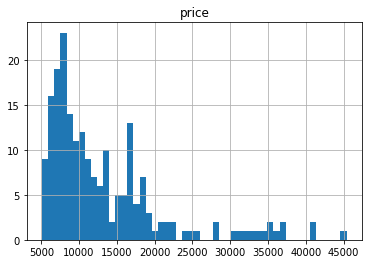

In [31]:
pricedCars.hist('price', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b009b9550>]],
      dtype=object)

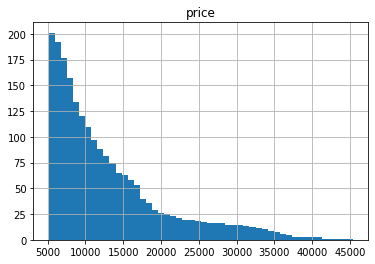

In [32]:
pricedCars.hist('price', bins=50, cumulative=-1)

In [33]:
hpPricedCars = pricedCars[pricedCars.horsepower.str.isnumeric()].copy()
hpPricedCars.horsepower = hpPricedCars.horsepower.astype(float)

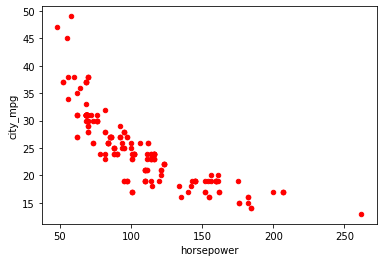

In [34]:
hpPricedCars.plot.scatter(x='horsepower', y='city_mpg', color='red')

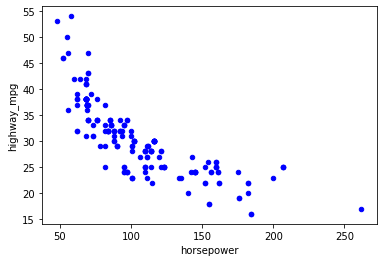

In [35]:
hpPricedCars.plot.scatter(x='horsepower', y='highway_mpg', color='blue')

In [36]:
priceGroups = pricedCars.groupby(['make'])['price']
means = priceGroups.mean()
std = priceGroups.std()

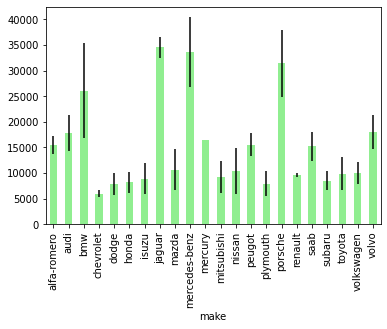

In [37]:
fig, ax = plt.subplots()
means.plot.bar(ax=ax, yerr=std, color='lightgreen')